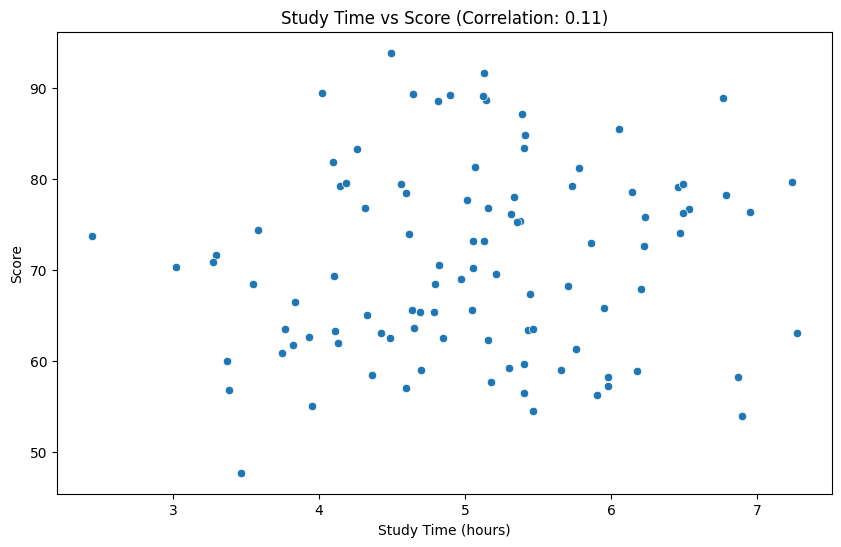

상관계수: 0.11


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'study_time': np.random.normal(5, 1, 100),
    'score': np.random.normal(70, 10, 100)
})

# 상관계수 계산
correlation = data['study_time'].corr(data['score'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_time', y='score', data=data)
plt.title(f'Study Time vs Score (Correlation: {correlation:.2f})')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.show()

print(f"상관계수: {correlation:.2f}")


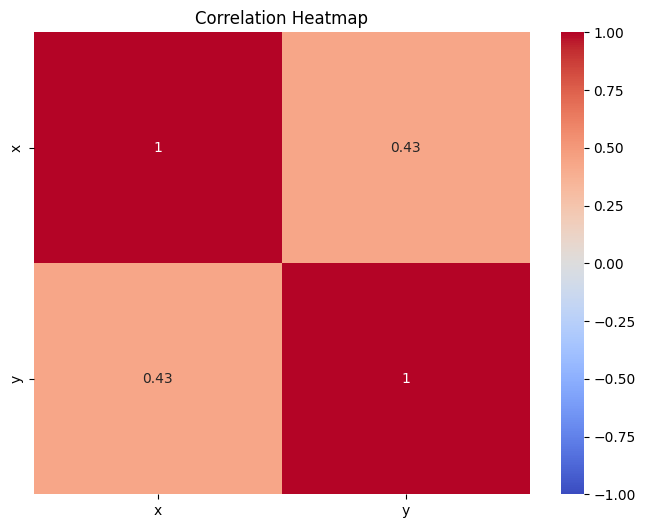

상관계수: 0.4316
p-value: 0.0000
p-value(0.0000)가 0.05보다 작으므로, 상관관계가 통계적으로 유의합니다.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x': np.random.normal(0, 1, 1000),
    'y': np.random.normal(0, 1, 1000)
})
data['y'] += 0.5 * data['x']  # 약한 양의 상관관계 생성

# 상관계수 계산
corr, p_value = stats.pearsonr(data['x'], data['y'])

# 상관계수 행렬 및 히트맵
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 해석
alpha = 0.05
if p_value < alpha:
    print(f"p-value({p_value:.4f})가 {alpha}보다 작으므로, 상관관계가 통계적으로 유의합니다.")
else:
    print(f"p-value({p_value:.4f})가 {alpha}보다 크므로, 상관관계가 통계적으로 유의하지 않습니다.")


X 변수의 정규성 검정 p-value: 0.5916
Y 변수의 정규성 검정 p-value: 0.3426
X 변수는 정규성을 따릅니다.
Y 변수는 정규성을 따릅니다.


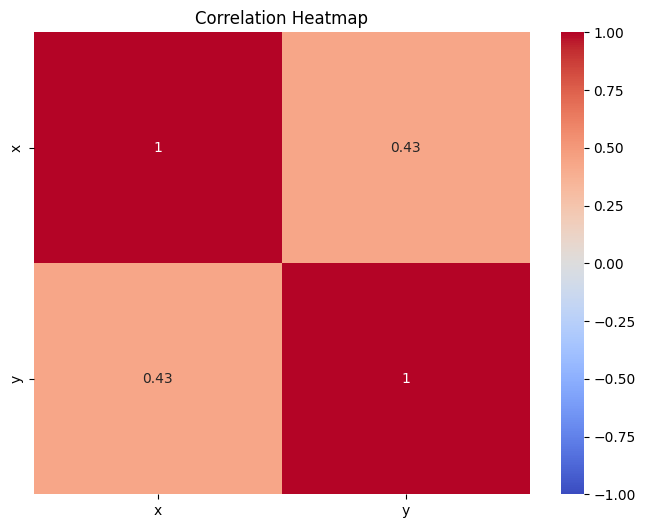

상관계수: 0.4316
p-value: 0.0000
p-value(0.0000)가 0.05보다 작으므로, 상관관계가 통계적으로 유의합니다.


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x': np.random.normal(0, 1, 1000),
    'y': np.random.normal(0, 1, 1000)
})
data['y'] += 0.5 * data['x']  # 약한 양의 상관관계 생성

# 정규성 검정 - shapiro 검정 -> p_value가 0.05보다 작을때 정규분포와 근접하다.
x_stat, x_p_value = stats.shapiro(data['x'])
y_stat, y_p_value = stats.shapiro(data['y'])

print(f"X 변수의 정규성 검정 p-value: {x_p_value:.4f}")
print(f"Y 변수의 정규성 검정 p-value: {y_p_value:.4f}")

# 정규성 검정 해석
alpha = 0.05
if x_p_value < alpha:
    print("X 변수는 정규성을 따르지 않습니다.")
else:
    print("X 변수는 정규성을 따릅니다.")

if y_p_value < alpha:
    print("Y 변수는 정규성을 따르지 않습니다.")
else:
    print("Y 변수는 정규성을 따릅니다.")

# 상관계수 계산
corr, p_value = stats.pearsonr(data['x'], data['y'])

# 상관계수 행렬 및 히트맵
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 상관계수와 p-value 출력
print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 상관계수 유의성 검정 해석
if p_value < alpha:
    print(f"p-value({p_value:.4f})가 {alpha}보다 작으므로, 상관관계가 통계적으로 유의합니다.")
else:
    print(f"p-value({p_value:.4f})가 {alpha}보다 크므로, 상관관계가 통계적으로 유의하지 않습니다.")


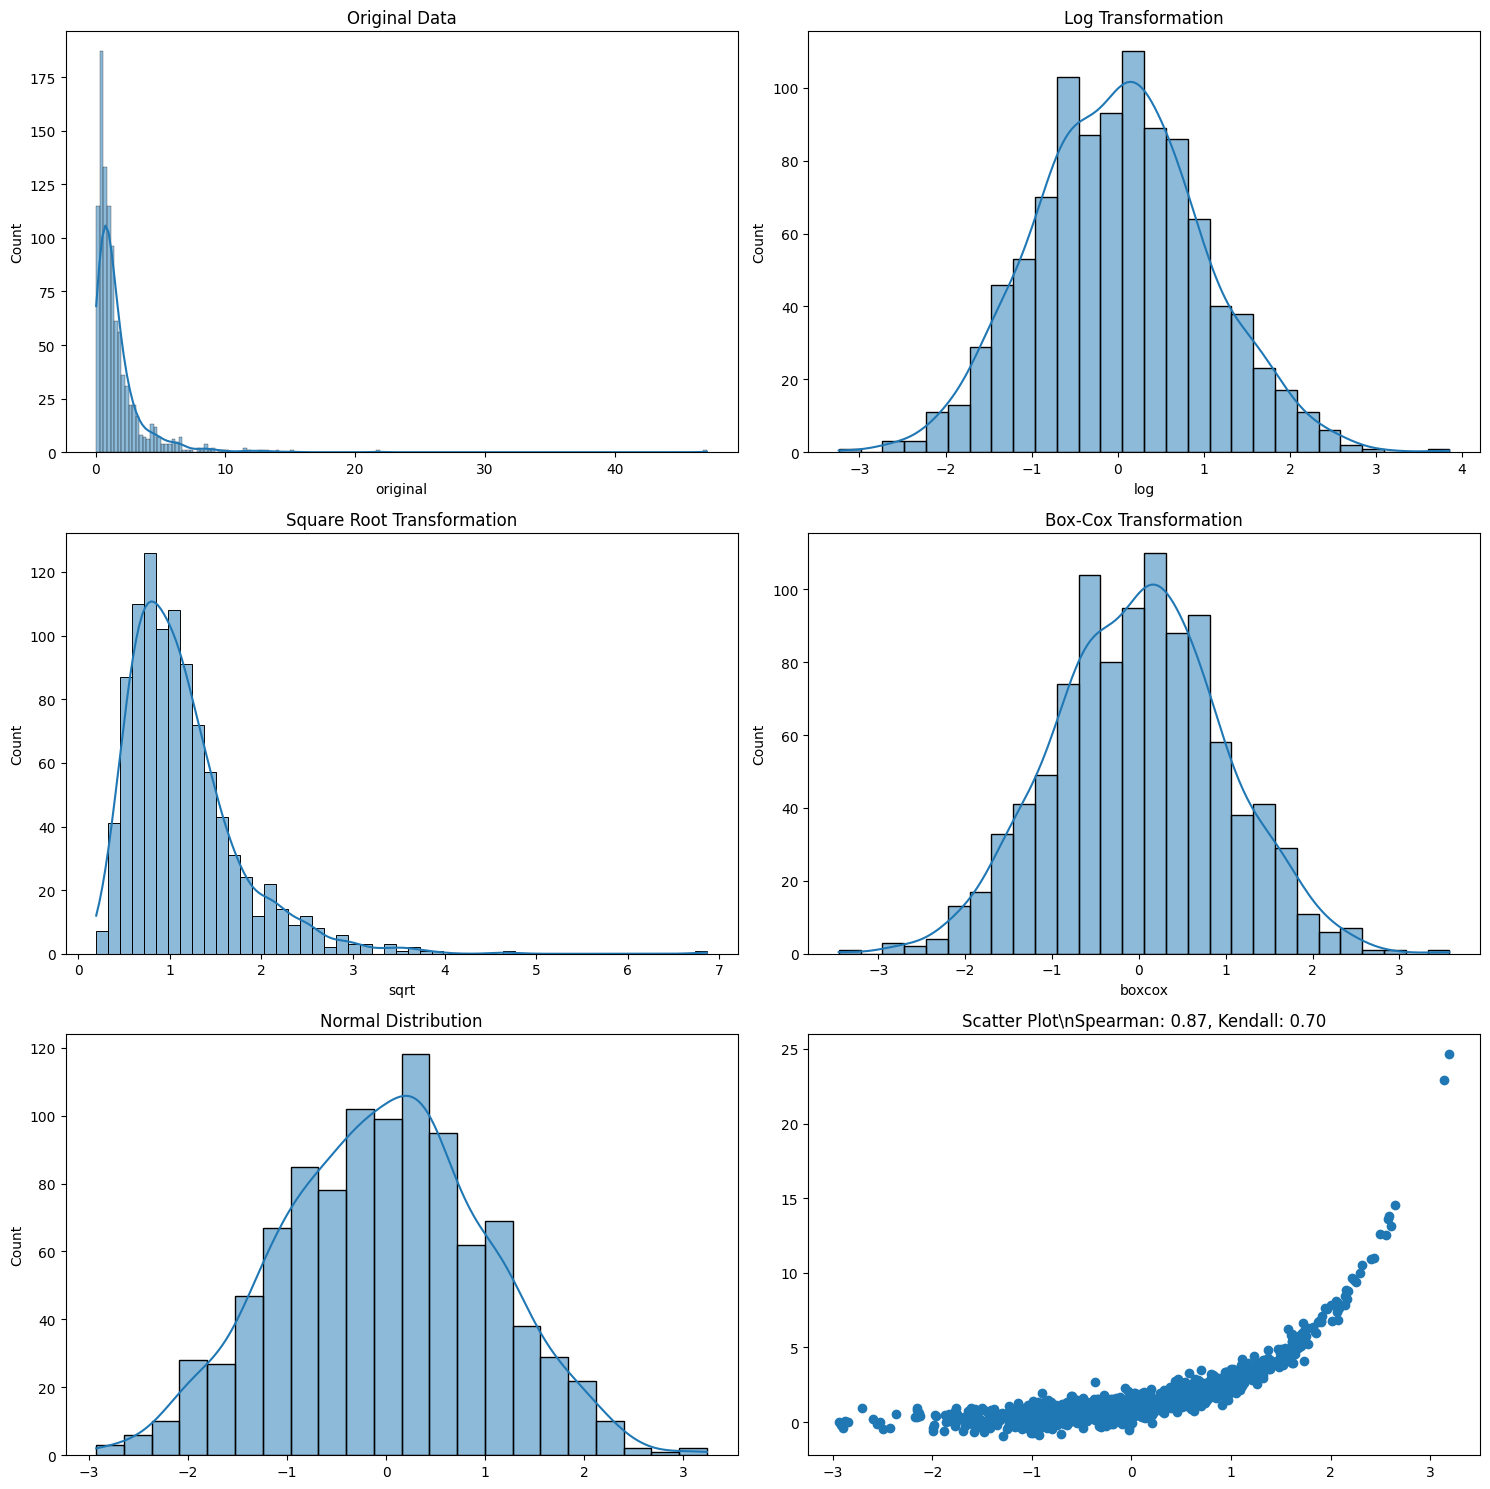

Spearman correlation: 0.8747
Kendall's tau: 0.7042


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, kendalltau

# 비정규분포 데이터 생성
np.random.seed(42)
non_normal_data = np.exp(np.random.normal(0, 1, 1000))

# 데이터프레임 생성
df = pd.DataFrame({'original': non_normal_data})

# 1. 데이터 변환
df['log'] = np.log(df['original'])
df['sqrt'] = np.sqrt(df['original'])

# 박스-콕스 변환
df['boxcox'], _ = stats.boxcox(df['original'])

# 2. 순위 상관계수
x = np.random.normal(0, 1, 1000)
y = np.exp(x) + np.random.normal(0, 0.5, 1000)

spearman_corr, _ = spearmanr(x, y)
kendall_corr, _ = kendalltau(x, y)

# 그래프 그리기
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 원본 데이터 히스토그램
sns.histplot(df['original'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Original Data')

# 로그 변환 히스토그램
sns.histplot(df['log'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Log Transformation')

# 제곱근 변환 히스토그램
sns.histplot(df['sqrt'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Square Root Transformation')

# 박스-콕스 변환 히스토그램
sns.histplot(df['boxcox'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Box-Cox Transformation')

# 정규분포 그래프
x_normal = np.random.normal(0, 1, 1000)
sns.histplot(x_normal, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Normal Distribution')

# 산점도 (순위 상관계수 시각화)
axs[2, 1].scatter(x, y)
axs[2, 1].set_title(f'Scatter Plot\\nSpearman: {spearman_corr:.2f}, Kendall: {kendall_corr:.2f}')

plt.tight_layout()
plt.show()

print(f"Spearman correlation: {spearman_corr:.4f}")
print(f"Kendall's tau: {kendall_corr:.4f}")


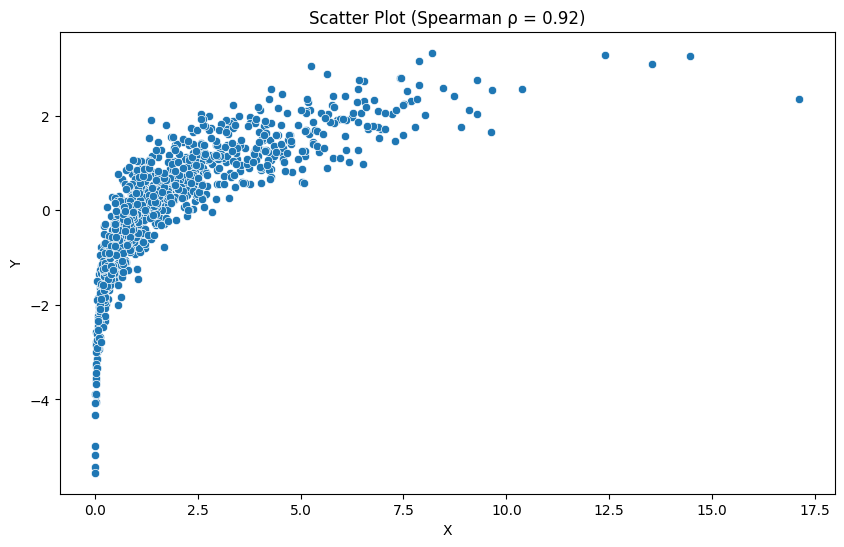

스피어만 상관계수: 0.9161
p-value: 0.0000
p-value(0.0000)가 0.05보다 작으므로, 상관관계가 통계적으로 유의합니다.
이는 강한 양의 단조적 관계를 나타냅니다.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 샘플 데이터 생성
np.random.seed(0)
x = np.random.exponential(scale=2, size=1000)  # 지수 분포
y = np.log(x) + np.random.normal(0, 0.5, 1000)  # 비선형 관계

# 스피어만 상관계수 계산
spearman_corr, p_value = stats.spearmanr(x, y)

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.title(f'Scatter Plot (Spearman ρ = {spearman_corr:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(f"스피어만 상관계수: {spearman_corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 해석
alpha = 0.05
if p_value < alpha:
    print(f"p-value({p_value:.4f})가 {alpha}보다 작으므로, 상관관계가 통계적으로 유의합니다.")
else:
    print(f"p-value({p_value:.4f})가 {alpha}보다 크므로, 상관관계가 통계적으로 유의하지 않습니다.")

# 상관관계의 강도 해석
if abs(spearman_corr) < 0.3:
    strength = "약한"
elif abs(spearman_corr) < 0.7:
    strength = "중간 정도의"
else:
    strength = "강한"

print(f"이는 {strength} {'양의' if spearman_corr > 0 else '음의'} 단조적 관계를 나타냅니다.")


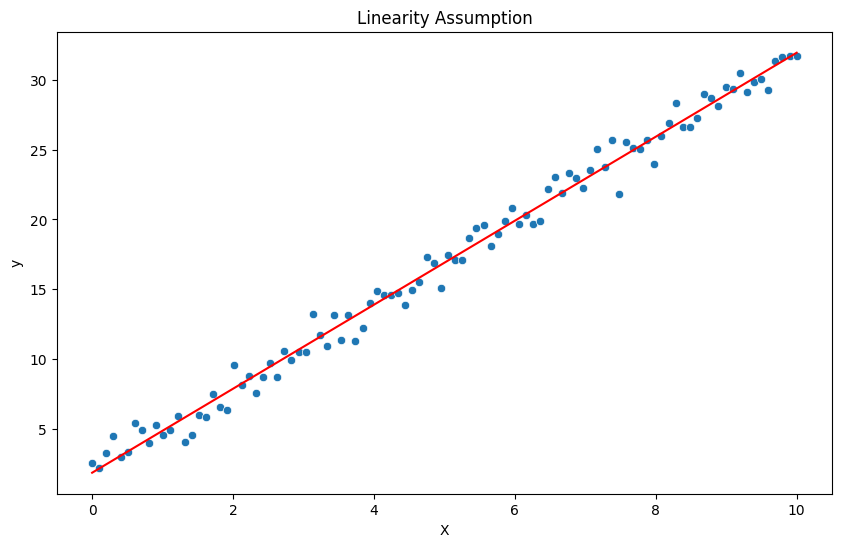

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

# 데이터 생성
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 + 3 * X + np.random.normal(0, 1, 100)  # y = 2 + 3X + ε

# 데이터프레임 생성
df = pd.DataFrame({'X': X, 'y': y})

# 모델 피팅
model = ols('y ~ X', data=df).fit()
df['predicted'] = model.predict(df['X'])
df['residuals'] = df['y'] - df['predicted']

# 1. 선형성 가정
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=df)
sns.lineplot(x='X', y='predicted', data=df, color='red')
plt.title('Linearity Assumption')
plt.show()

Durbin-Watson statistic: 2.0425


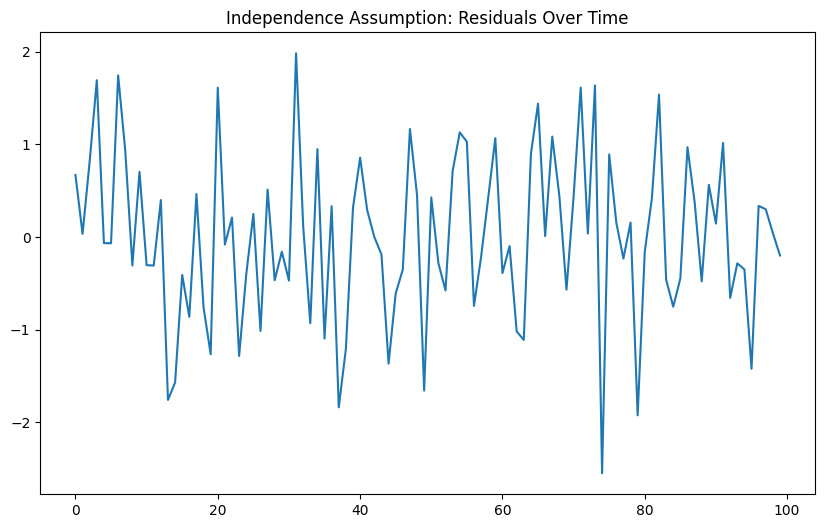

In [7]:
# 2. 독립성 가정
durbin_watson_stat = durbin_watson(df['residuals'])
print(f"Durbin-Watson statistic: {durbin_watson_stat:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(df['residuals'])
plt.title('Independence Assumption: Residuals Over Time')
plt.show()

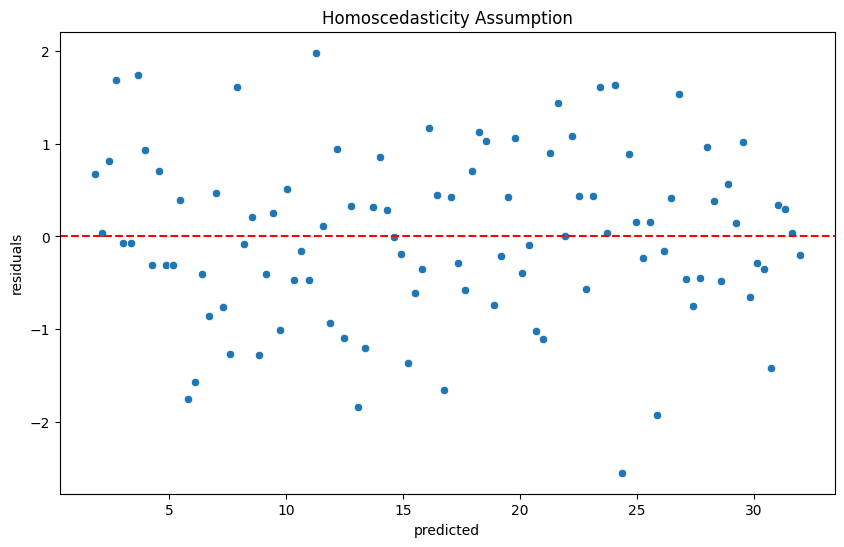

In [8]:
# 3. 등분산성 가정
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted', y='residuals', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity Assumption')
plt.show()

In [9]:
# Breusch-Pagan 테스트를 위한 설계 행렬 생성
X_with_const = add_constant(df['X'])
_, p_value, _, _ = het_breuschpagan(df['residuals'], X_with_const)
print(f"Breusch-Pagan test p-value: {p_value:.4f}")

Breusch-Pagan test p-value: 0.6014


<Figure size 1000x600 with 0 Axes>

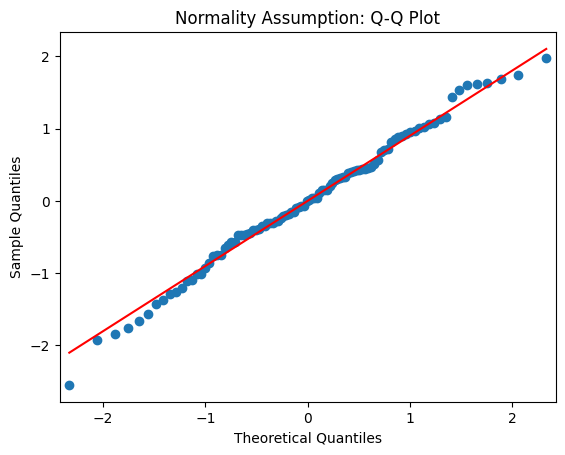

Shapiro-Wilk test p-value: 0.7927


In [10]:
# 4. 정규성 가정
plt.figure(figsize=(10, 6))
qqplot(df['residuals'], line='s')
plt.title('Normality Assumption: Q-Q Plot')
plt.show()

_, p_value = stats.shapiro(df['residuals'])
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")

In [11]:


# 5. 독립변수의 비확률성
# 이 가정은 데이터 생성 과정과 관련이 있으므로 별도의 시각화나 검정은 하지 않습니다.
# 실제 데이터에서는 이 가정이 만족되는지 데이터 수집 과정을 검토해야 합니다.

# 추가: 모델 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9286.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.75e-99
Time:                        03:38:13   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8272      0.181     10.094      0.0

y절편 (β₀): 2.2222
기울기 (β₁): 2.9937
R² Score: 0.9869


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

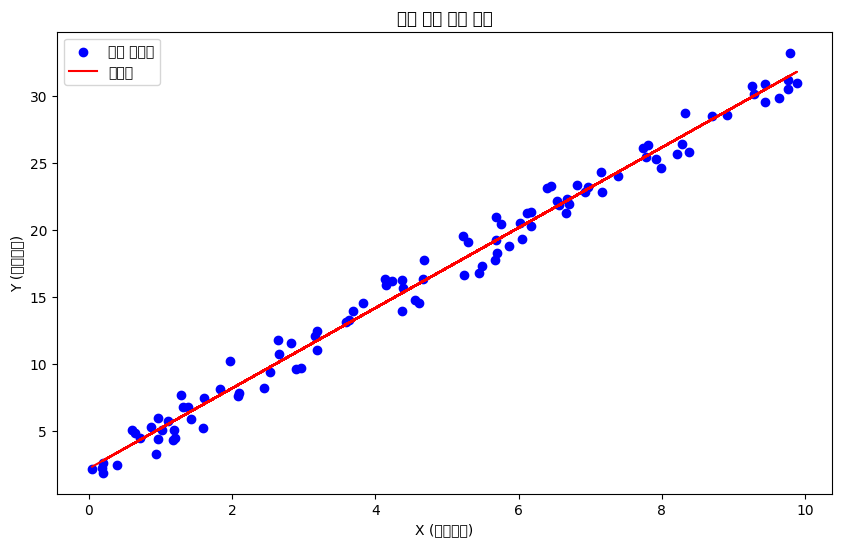

X가 5일 때 예측된 Y 값: 17.1906


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.randn(100, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 결과 출력
print(f"y절편 (β₀): {model.intercept_[0]:.4f}")
print(f"기울기 (β₁): {model.coef_[0][0]:.4f}")
print(f"R² Score: {r2_score(y, y_pred):.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('X (독립변수)')
plt.ylabel('Y (종속변수)')
plt.title('단순 선형 회귀 모델')
plt.legend()
plt.show()

# 새로운 X 값에 대한 Y 예측
new_X = np.array([[5]])
predicted_y = model.predict(new_X)
print(f"X가 5일 때 예측된 Y 값: {predicted_y[0][0]:.4f}")


β₀ (직접 계산): 2.2222
β₁ (직접 계산): 2.9937
β₀ (sklearn): 2.2222
β₁ (sklearn): 2.9937
R² Score: 0.9869


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

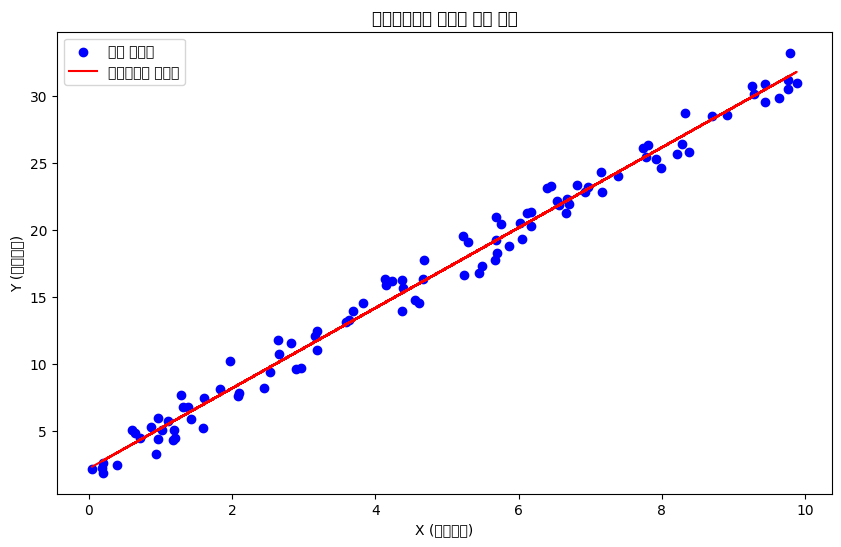

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.randn(100, 1)

# 최소제곱법 직접 구현
def least_squares(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean)**2)

    beta1 = numerator / denominator
    beta0 = y_mean - beta1 * X_mean

    return beta0, beta1

# 최소제곱법으로 회귀계수 계산
beta0, beta1 = least_squares(X, y)

# 예측값 계산
y_pred = beta0 + beta1 * X

# 결과 출력
print(f"β₀ (직접 계산): {beta0:.4f}")
print(f"β₁ (직접 계산): {beta1:.4f}")

# sklearn을 사용한 선형 회귀 (비교용)
model = LinearRegression()
model.fit(X, y)

print(f"β₀ (sklearn): {model.intercept_[0]:.4f}")
print(f"β₁ (sklearn): {model.coef_[0][0]:.4f}")

print(f"R² Score: {r2_score(y, y_pred):.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='최소제곱법 회귀선')
plt.xlabel('X (독립변수)')
plt.ylabel('Y (종속변수)')
plt.title('최소제곱법을 이용한 선형 회귀')
plt.legend()
plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.randn(100, 1)

# sklearn을 사용한 선형 회귀
model_sk = LinearRegression()
model_sk.fit(X, y)

print("sklearn 결과:")
print(f"절편 (β₀): {model_sk.intercept_[0]:.4f}")
print(f"기울기 (β₁): {model_sk.coef_[0][0]:.4f}")

# statsmodels을 사용한 선형 회귀 (유의성 검정 포함)
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()

print("\\nstatsmodels 결과:")
print(model_sm.summary())

# 회귀계수 해석
print("\\n회귀계수 해석:")
print(f"절편 (β₀): X가 0일 때, Y의 예측값은 {model_sm.params[0]:.4f}입니다.")
print(f"기울기 (β₁): X가 1단위 증가할 때, Y는 평균적으로 {model_sm.params[1]:.4f} 만큼 증가합니다.")

# 유의성 해석
alpha = 0.05
print("\\n유의성 검정 결과:")
for i, p_value in enumerate(model_sm.pvalues):
    if i == 0:
        coef_name = "절편"
    else:
        coef_name = f"X{i}"

    if p_value < alpha:
        print(f"{coef_name}의 p-value({p_value:.4f})가 {alpha}보다 작으므로, 통계적으로 유의합니다.")
    else:
        print(f"{coef_name}의 p-value({p_value:.4f})가 {alpha}보다 크므로, 통계적으로 유의하지 않습니다.")


sklearn 결과:
절편 (β₀): 2.2222
기울기 (β₁): 2.9937
\nstatsmodels 결과:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7356.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           5.39e-94
Time:                        05:35:21   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

R² Score: 0.9869
\nstatsmodels 결과:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7356.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           5.39e-94
Time:                        05:52:27   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.

<ipython-input-15-ce0cded29d60>:52: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-15-ce0cded29d60>:52: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig

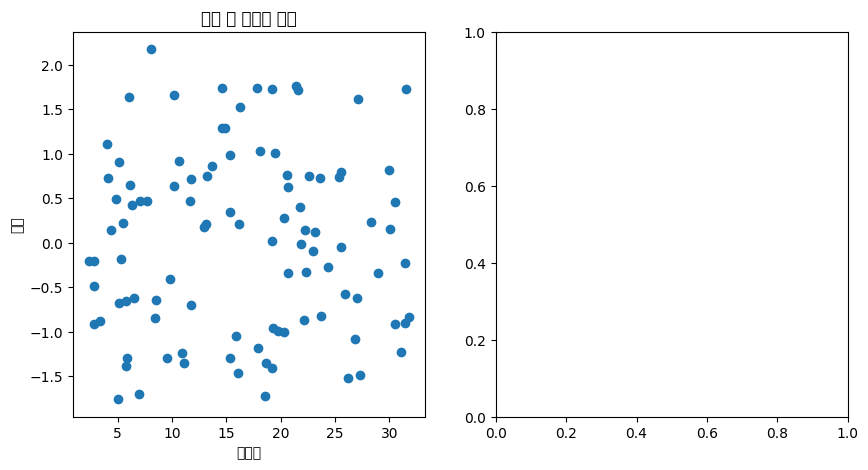

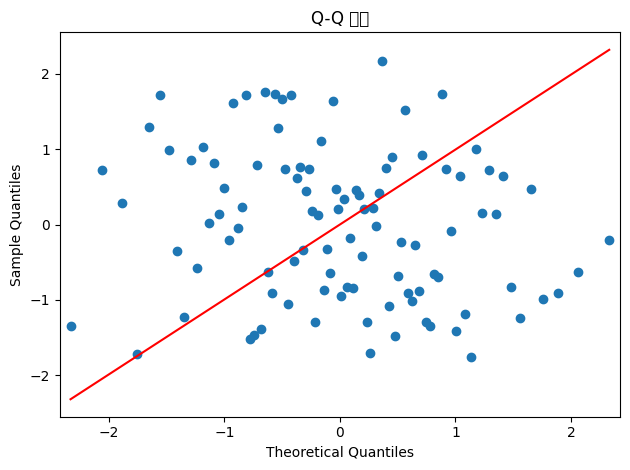

\n모델 평가 결과:
R²가 0.9869이므로, 이 모델은 종속변수 변동의 98.7%를 설명합니다.
조정된 R²는 0.9867입니다.
조정된 R²가 일반 R²보다 작으므로, 불필요한 독립변수가 없음을 시사합니다.
AIC: 287.0287, BIC: 292.2390
잔차 플롯과 Q-Q 플롯을 통해 모델 가정의 만족 여부를 시각적으로 확인할 수 있습니다.


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.randn(100, 1)

# sklearn을 사용한 선형 회귀
model_sk = LinearRegression()
model_sk.fit(X, y)
y_pred = model_sk.predict(X)

# 결정계수 계산
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

# statsmodels을 사용한 선형 회귀 (추가 지표 계산)
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()

print("\\nstatsmodels 결과:")
print(model_sm.summary())

# 추가 평가 지표 계산
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"\\n평균제곱오차 (MSE): {mse:.4f}")
print(f"평균절대오차 (MAE): {mae:.4f}")

# 잔차 분석
residuals = y - y_pred

# 잔차 플롯
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(y_pred, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 대 예측값 플롯')

# Q-Q 플롯
plt.subplot(122)
sm.qqplot(residuals, line='s')
plt.title('Q-Q 플롯')

plt.tight_layout()
plt.show()

# 결과 해석
print("\\n모델 평가 결과:")
print(f"R²가 {r2:.4f}이므로, 이 모델은 종속변수 변동의 {r2*100:.1f}%를 설명합니다.")
print(f"조정된 R²는 {model_sm.rsquared_adj:.4f}입니다.")
if model_sm.rsquared_adj < r2:
    print("조정된 R²가 일반 R²보다 작으므로, 불필요한 독립변수가 없음을 시사합니다.")
print(f"AIC: {model_sm.aic:.4f}, BIC: {model_sm.bic:.4f}")
print("잔차 플롯과 Q-Q 플롯을 통해 모델 가정의 만족 여부를 시각적으로 확인할 수 있습니다.")


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 샘플 데이터 생성
np.random.seed(0)
X1 = np.random.rand(100, 1)
X2 = 0.5 * X1 + 0.5 * np.random.rand(100, 1)  # X1과 상관관계 있는 변수
X3 = np.random.rand(100, 1)
y = 2 + 3 * X1 + 1.5 * X2 + 2 * X3 + np.random.randn(100, 1)

X = np.hstack((X1, X3))

# 다중 선형 회귀 모델 (sklearn)
model_sk = LinearRegression()
model_sk.fit(X, y)

# 다중 선형 회귀 모델 (statsmodels)
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()

print(model_sm.summary())

# 상관계수 행렬
corr_matrix = pd.DataFrame(X).corr()
print("\\n상관계수 행렬:")
print(corr_matrix)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = ["X1", "X2", "X3"]
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("\\nVIF:")
print(vif_data)

# 결과 해석
print("\\n모델 해석:")
print(f"R-squared: {model_sm.rsquared:.4f}")
print("회귀계수:")
for i, coef in enumerate(model_sm.params[1:]):
    print(f"X{i+1}: {coef:.4f}")

print("\\n다중공선성 진단:")
if vif_data["VIF"].max() > 10:
    print("VIF가 10을 초과하는 변수가 있어 심각한 다중공선성이 의심됩니다.")
elif vif_data["VIF"].max() > 5:
    print("VIF가 5를 초과하는 변수가 있어 다중공선성이 의심됩니다.")
else:
    print("심각한 다중공선성 문제는 없어 보입니다.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     70.68
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.16e-19
Time:                        06:32:58   Log-Likelihood:                -133.47
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      97   BIC:                             280.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4347      0.243     10.038      0.0

ValueError: Length of values (2) does not match length of index (3)

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='PRICE')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 평가 함수
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# 전체 특성 사용
all_features_mse, all_features_r2 = evaluate_model(X_train, X_test, y_train, y_test)
print("All Features - MSE: {:.2f}, R2: {:.2f}".format(all_features_mse, all_features_r2))

# 상위 K개 특성 선택 (전진 선택법의 간단한 버전)
# 이 함수는 F-통계량을 기반으로 상위 K개의 가장 중요한 특성을 선택합니다.
def select_k_best_features(X_train, y_train, k):
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.get_support()].tolist()
    return selected_features

# 다양한 k 값으로 실험
for k in [3, 5, 7]:
    selected_features = select_k_best_features(X_train, y_train, k)
    print(f"\nTop {k} features:", selected_features)

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    mse, r2 = evaluate_model(X_train_selected, X_test_selected, y_train, y_test)
    print(f"Top {k} Features - MSE: {mse:.2f}, R2: {r2:.2f}")

All Features - MSE: 0.56, R2: 0.58

Top 3 features: ['MedInc', 'AveRooms', 'Latitude']
Top 3 Features - MSE: 0.69, R2: 0.47

Top 5 features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
Top 5 Features - MSE: 0.64, R2: 0.51

Top 7 features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']
Top 7 Features - MSE: 0.56, R2: 0.58


In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드 및 분할
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='PRICE')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 평가 함수
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# 전체 특성 사용
all_features_mse, all_features_r2 = evaluate_model(X_train, X_test, y_train, y_test)
print("All Features - MSE: {:.2f}, R2: {:.2f}".format(all_features_mse, all_features_r2))

# 전진 선택법
print("\n전진 선택법:")
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)
selected_features = X_train.columns[sfs.get_support()].tolist()
print("Selected features:", selected_features)
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]
mse, r2 = evaluate_model(X_train_sfs, X_test_sfs, y_train, y_test)
print(f"Forward Selection - MSE: {mse:.2f}, R2: {r2:.2f}")

# 후진 제거법 (RFE 사용)
print("\n후진 제거법:")
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_].tolist()
print("Selected features:", selected_features)
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
mse, r2 = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test)
print(f"Backward Elimination - MSE: {mse:.2f}, R2: {r2:.2f}")

# 단계적 선택법 (RFECV 사용)
print("\n단계적 선택법:")
rfecv = RFECV(estimator=LinearRegression(), cv=5)
rfecv = rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_].tolist()
print("Selected features:", selected_features)
X_train_rfecv = X_train[selected_features]
X_test_rfecv = X_test[selected_features]
mse, r2 = evaluate_model(X_train_rfecv, X_test_rfecv, y_train, y_test)
print(f"Stepwise Selection - MSE: {mse:.2f}, R2: {r2:.2f}")

All Features - MSE: 0.56, R2: 0.58

전진 선택법:
Selected features: ['MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude']
Forward Selection - MSE: 0.55, R2: 0.58

후진 제거법:
Selected features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
Backward Elimination - MSE: 0.57, R2: 0.57

단계적 선택법:
Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']
Stepwise Selection - MSE: 0.56, R2: 0.58


In [ ]:
Top 5 features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
Top 5 Features - MSE: 0.64, R2: 0.51

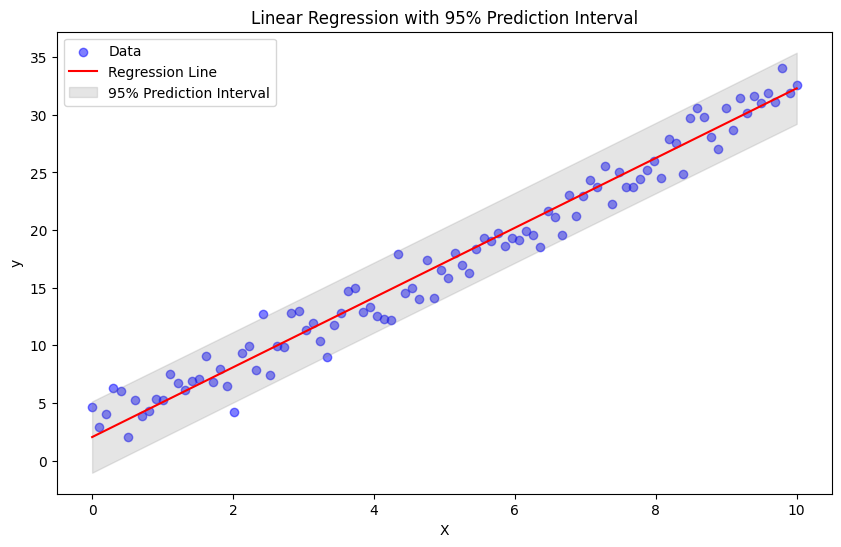

X = 5일 때:
예측값: 17.17
95% 예측 구간: (14.13, 20.21)


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# 샘플 데이터 생성
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + 3 * X + np.random.normal(0, 1.5, (100, 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X)

# 신뢰구간 계산 함수
def prediction_interval(X, y, model, X_pred, alpha=0.05):
    n = len(X)
    dof = n - 2

    # 표준 오차 계산
    mse = np.sum((y - model.predict(X)) ** 2) / dof
    X_mean = np.mean(X)
    std_err = np.sqrt(mse * (1 + 1/n + (X_pred - X_mean) ** 2 / np.sum((X - X_mean) ** 2)))

    # 예측 구간
    t_value = stats.t.ppf(1 - alpha / 2, dof)
    interval = t_value * std_err

    return interval

# 신뢰구간 계산
interval = prediction_interval(X_train, y_train, model, X)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.fill_between(X.ravel(), (y_pred - interval).ravel(), (y_pred + interval).ravel(),
                 color='gray', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with 95% Prediction Interval')
plt.legend()
plt.show()

# 특정 X 값에 대한 예측과 신뢰구간
X_new = np.array([[5]])
y_pred_new = model.predict(X_new)
interval_new = prediction_interval(X_train, y_train, model, X_new)

print(f"X = 5일 때:")
print(f"예측값: {y_pred_new[0][0]:.2f}")
print(f"95% 예측 구간: ({y_pred_new[0][0] - interval_new[0][0]:.2f}, {y_pred_new[0][0] + interval_new[0][0]:.2f})")


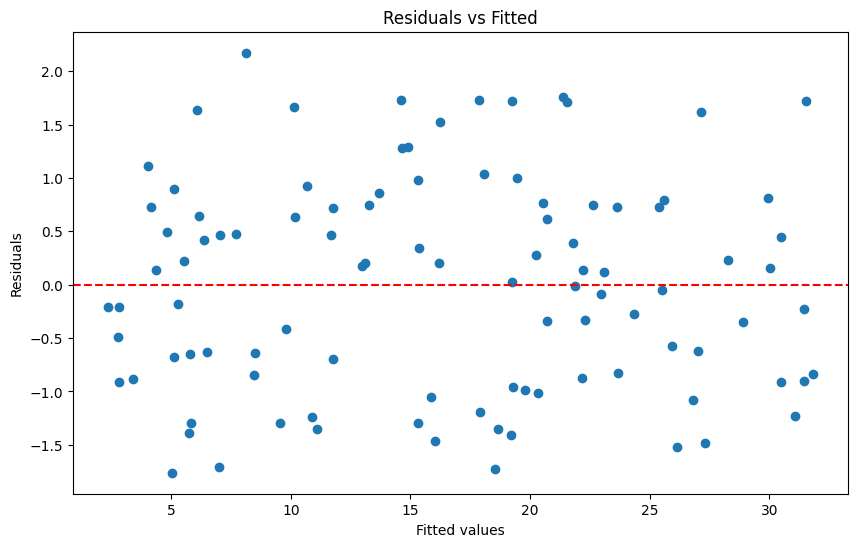

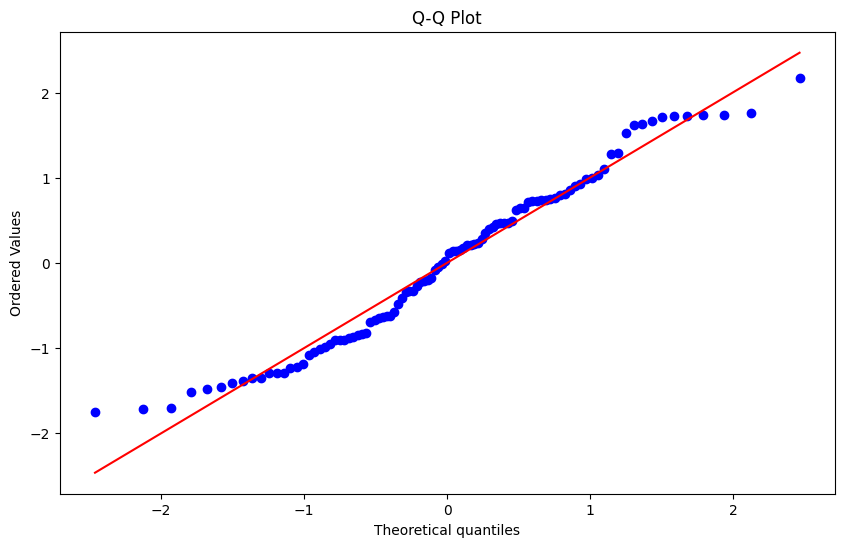

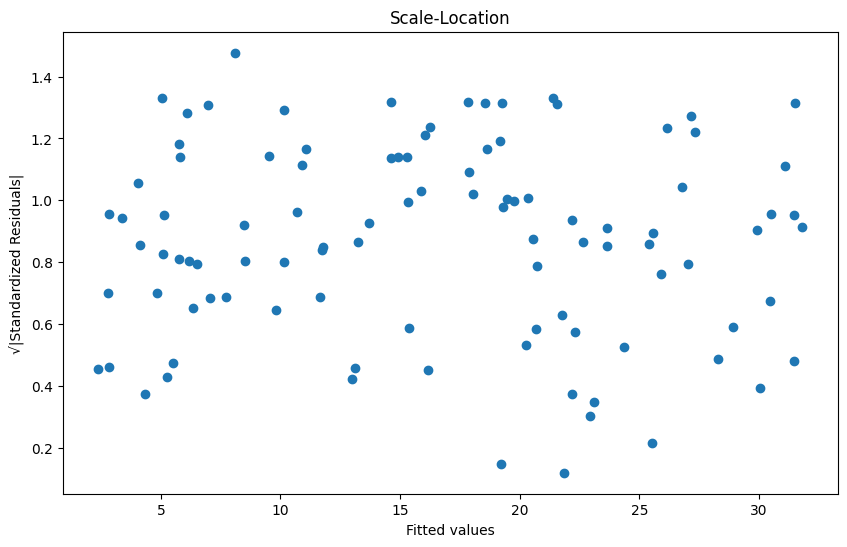

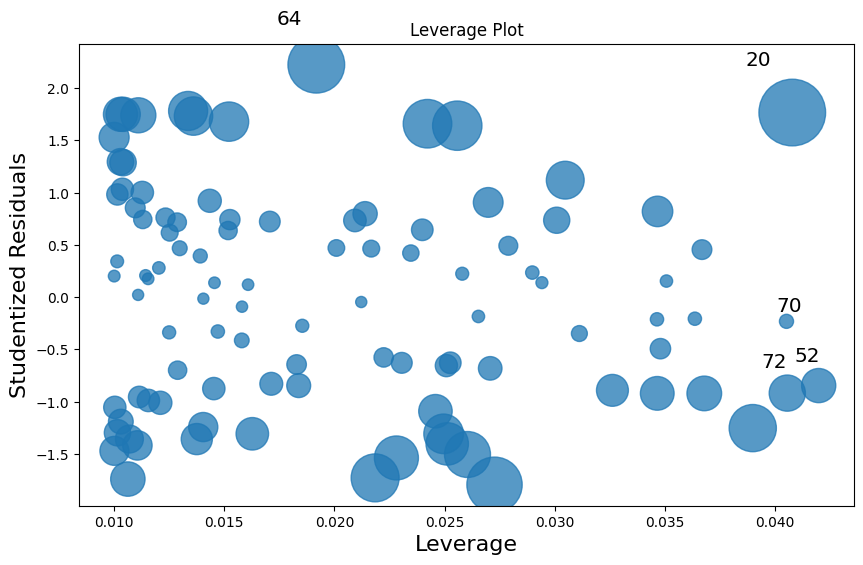

잔차 분석 결과 해석:
1. 잔차 대 적합값 도표: 패턴이 없이 무작위로 분포하면 선형성과 등분산성 가정이 충족됩니다.
2. Q-Q 도표: 점들이 대각선에 가깝게 위치하면 정규성 가정이 충족됩니다.
3. 척도-위치 도표: 수평에 가까운 패턴이 나타나면 등분산성 가정이 충족됩니다.
4. 레버리지 도표: 우상단이나 우하단에 위치한 점들은 영향력 있는 관측치일 수 있으므로 주의가 필요합니다.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.normal(0, 1, (100, 1))

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측 및 잔차 계산
y_pred = model.predict(X)
residuals = y - y_pred

# 1. 잔차 대 적합값 도표
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Q-Q 도표
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals.ravel(), plot=ax, fit=True)
ax.set_title("Q-Q Plot")
plt.show()

# 3. 척도-위치 도표
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, np.sqrt(np.abs(stats.zscore(residuals))))
plt.xlabel('Fitted values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location')
plt.show()

# 4. 레버리지 도표
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()
influence = OLSInfluence(model_sm)

fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.influence_plot(model_sm, ax=ax, criterion="cooks")
ax.set_title("Leverage Plot")
plt.show()

# 결과 해석
print("잔차 분석 결과 해석:")
print("1. 잔차 대 적합값 도표: 패턴이 없이 무작위로 분포하면 선형성과 등분산성 가정이 충족됩니다.")
print("2. Q-Q 도표: 점들이 대각선에 가깝게 위치하면 정규성 가정이 충족됩니다.")
print("3. 척도-위치 도표: 수평에 가까운 패턴이 나타나면 등분산성 가정이 충족됩니다.")
print("4. 레버리지 도표: 우상단이나 우하단에 위치한 점들은 영향력 있는 관측치일 수 있으므로 주의가 필요합니다.")


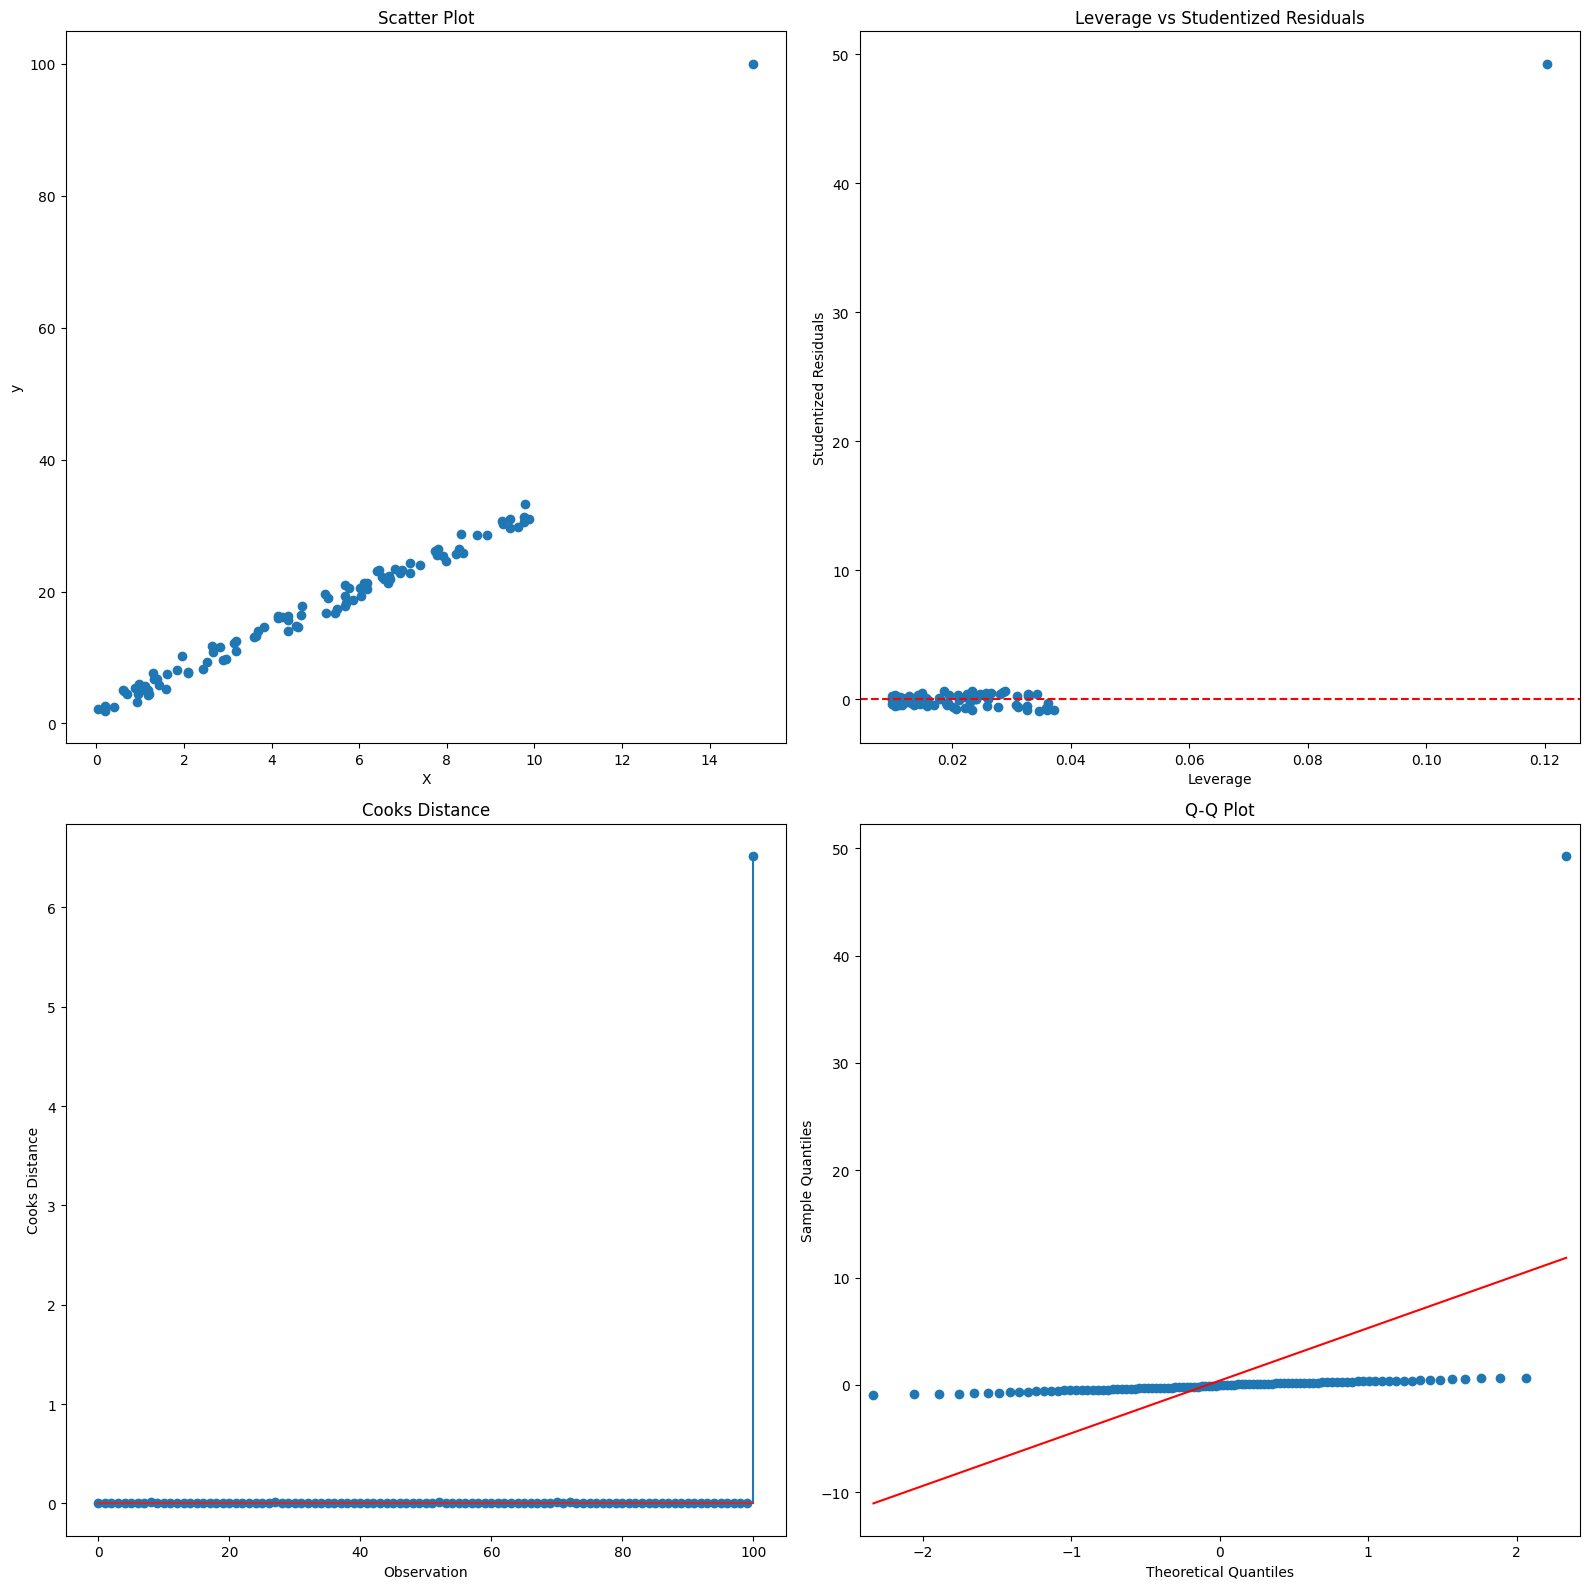

잠재적 이상치/영향점:
        X      y  Leverage  Cooks Distance  Student Residuals
100  15.0  100.0  0.120451        6.515857          49.274312


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 + 3 * X + np.random.normal(0, 1, (100, 1))

# 의도적으로 이상치/영향점 추가
X = np.vstack([X, [[15]]])
y = np.vstack([y, [[100]]])

# 데이터프레임 생성
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# 모델 학습
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# 영향점 진단
influence = OLSInfluence(model)
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]
student_resid = influence.resid_studentized_external

# 결과 데이터프레임에 추가
df['Leverage'] = leverage
df['Cooks Distance'] = cooks_d
df['Student Residuals'] = student_resid

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# 1. 산점도
axes[0, 0].scatter(X, y)
axes[0, 0].set_title('Scatter Plot')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')

# 2. 레버리지 vs 표준화 잔차
axes[0, 1].scatter(leverage, student_resid)
axes[0, 1].set_title('Leverage vs Studentized Residuals')
axes[0, 1].set_xlabel('Leverage')
axes[0, 1].set_ylabel('Studentized Residuals')
axes[0, 1].axhline(y=0, color='r', linestyle='--')

# 3. 쿡의 거리
axes[1, 0].stem(range(len(cooks_d)), cooks_d)
axes[1, 0].set_title('Cooks Distance')
axes[1, 0].set_xlabel('Observation')
axes[1, 0].set_ylabel('Cooks Distance')

# 4. QQ 플롯
sm.qqplot(student_resid, line='s', ax=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 이상치/영향점 식별
print("잠재적 이상치/영향점:")
print(df[(np.abs(df['Student Residuals']) > 3) |
         (df['Leverage'] > 2*(X.shape[1]+1)/len(X)) |
         (df['Cooks Distance'] > 4/len(X))])



In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 1. 데이터 생성
np.random.seed(0)
n_samples = 1000 # 데이터 1000개 생성

age = np.random.randint(20, 70, n_samples) # 20세부터 70세까지 1000개를 생성
income = np.random.randint(30000, 100000, n_samples) # 30000~100000까지 소득을 생성
purchase = (age > 40) & (income > 60000) # 40세 이상, 60000만원 이상이면 구매를 많이했다. 아니면 구매를 적게했다.

# 타이타닉 -> 생존을 햇다. / 안했다. / 금융 연체를 했다. 안했다.
# 기준을 정하는것부터 통계학 / 데이터 분석가들이 하는 경우가 있어요.

# 2. 데이터프레임 생성
df = pd.DataFrame({
    'age': age,
    'income': income,
    'purchase': purchase.astype(int)
})

# 3. 데이터 분할
X = df[['age', 'income']] # 훈련 변수
y = df['purchase'] # 예측 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 데이터를 80:20로 구분

In [2]:
# 4. 상수항 추가 -> sklearn logisticregression -> 상수항 기본적으로 포함!
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [3]:
# 5. 모델 생성 및 학습
model = sm.Logit(y_train, X_train_sm)
results = model.fit()


Optimization terminated successfully.
         Current function value: 0.238973
         Iterations 9


In [4]:
# 6. 결과 출력
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                  0.6134
Time:                        02:13:31   Log-Likelihood:                -191.18
converged:                       True   LL-Null:                       -494.48
Covariance Type:            nonrobust   LLR p-value:                1.900e-132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.8077      1.716    -12.709      0.000     -25.171     -18.445
age            0.2122      0.018     11.829      0.000       0.177       0.247
income         0.0002   1.27e-05     12.073      0.0

In [10]:
# 7. 새로운 데이터에 대한 예측
new_customer = pd.DataFrame({'const': [1], 'age': [70], 'income': [105000]})
prediction = results.predict(new_customer)
print(f"\n새 고객의 구매 확률: {prediction[0]:.2f}")


새 고객의 구매 확률: 1.00


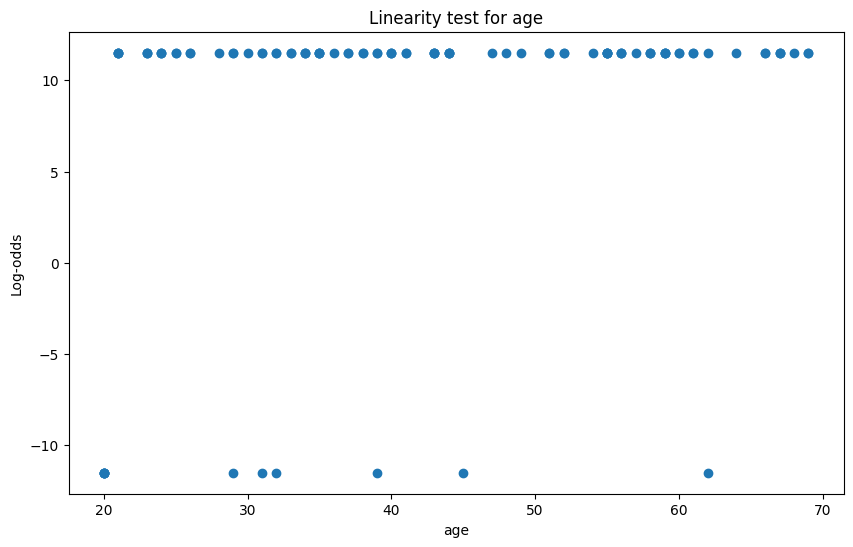

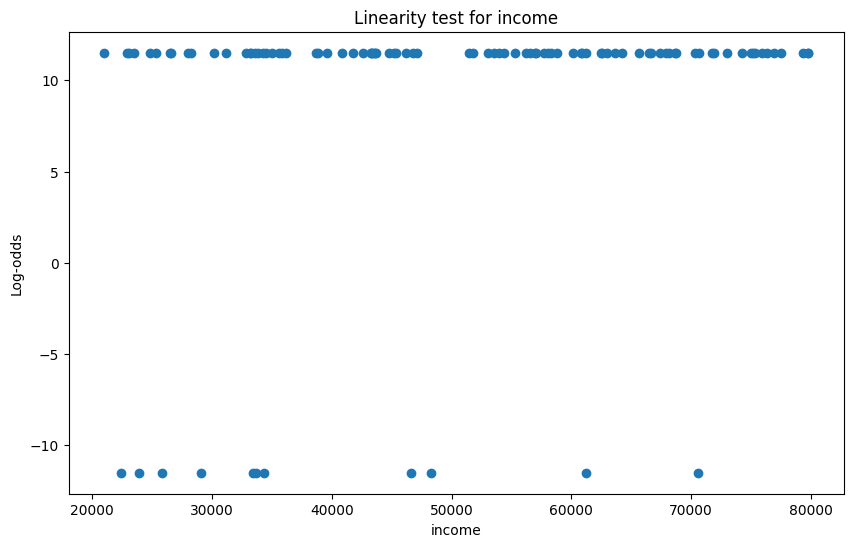

  Variable      VIF
0      age  5.03306
1   income  5.03306


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 예제 데이터 생성
np.random.seed(0)
n = 100
X = pd.DataFrame({
    'age': np.random.randint(20, 70, size=n),
    'income': np.random.randint(20000, 80000, size=n)
})
# 로지스틱 회귀를 위한 종속 변수 생성
y = (0.05 * X['age'] + 0.00001 * X['income'] + np.random.randn(n) > 1).astype(int)

# 로그 오즈와 독립변수 간의 선형성 검정
def linearity_test(X, y):
    # y가 0과 1로만 구성된 경우, logit을 계산할 때 무한대나 NaN이 발생하지 않도록 조정
    y_adj = np.clip(y, 1e-5, 1 - 1e-5)
    logit = np.log(y_adj / (1 - y_adj))
    for column in X.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(X[column], logit)
        plt.title(f'Linearity test for {column}')
        plt.xlabel(column)
        plt.ylabel('Log-odds')
        plt.show()

# 다중공선성 검정
def vif_test(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# 예시 실행
linearity_test(X, y)
print(vif_test(X))


# 1. 데이터 분석 및 탐색

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("데이터 shape:", X.shape)
print("\n처음 5개 행:")
print(X.head())
print(y.head())

데이터 shape: (569, 30)

처음 5개 행:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  

In [3]:
# 2. 다중공선성 검사

from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n다중공선성 검사 결과:")
print(check_multicollinearity(X))

# 1. 현재 변수들이 거의 모두 서로 연관되어있다.
# 2. 향후 최초 모델 적합결과를 보고, VIF가 높은 값중 유의하지 않은 것을 먼저 제거
# 3. 이름이 비슷해보이는 변수에 대해서 제거


다중공선성 검사 결과:
                   Variable           VIF
0               mean radius  63306.172036
2            mean perimeter  58123.586079
20             worst radius   9674.742602
22          worst perimeter   4487.781270
3                 mean area   1287.262339
23               worst area   1138.759252
9    mean fractal dimension    629.679874
29  worst fractal dimension    423.396723
4           mean smoothness    393.398166
24         worst smoothness    375.597155
21            worst texture    343.004387
1              mean texture    251.047108
10             radius error    236.665738
28           worst symmetry    218.919805
12          perimeter error    211.396334
5          mean compactness    200.980354
8             mean symmetry    184.426558
6            mean concavity    157.855046
7       mean concave points    154.241268
27     worst concave points    148.673180
25        worst compactness    132.884276
26          worst concavity     86.310362
13               are

In [4]:
# 3. 변수 선택 후진 제거법
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_with_constant = sm.add_constant(X[features])
        model = sm.OLS(y, X_with_constant).fit()

        max_p_value = max(model.pvalues[1:])
        if max_p_value > significance_level:
            remove_feature = features[model.pvalues[1:].argmax()]
            features.remove(remove_feature)
        else:
            break

    return features

selected_features = backward_elimination(X, y)
print("\n후진제거법으로 선택된 특성:")
print(selected_features)

# 유의수준이 0.05보다 이상인것들이 없을때가지 수행!


후진제거법으로 선택된 특성:
['mean radius', 'mean compactness', 'mean concave points', 'radius error', 'smoothness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst area', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


In [5]:
# 4. 실제 전처리!

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_selected = X[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [6]:
# 5. 모델 정확도!

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("\n모델 정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# 1. train과 test가 정확도가 약 5%p 이상 차이가 나면 과적합 의심 -> variance importance 살펴봐야합니다. -> 특정변수 1,2,3위에 영향치가 몰려있어요.
# ex) train - 95% test - 89% -> 과적합을 의심!
# 3%p train 95% / test 92%

# 위에서 나온 결과 -> 결국 (기존에 가지고 있던) 데이터 기반으로 한 결과
# 우리가 이 모델을 수행할 대상은 현재 데이터에 없는 새로운 고객!

# 2. 정확도는 높은데 precision, recall f1-score가 차이가 많이 나는 경우 -> 데이터적인 의심을 해봐야 된다. 특정 타겟에 데이터가 90% 이상 몰려있는 경우
# 또는 표본추츨이 잘못되었을수도 있구요.



모델 정확도: 0.956140350877193

분류 보고서:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n상위 5개 중요 특성:")
print(feature_importance)

# 주의해야될것
# 캐글이 아니라 현실의 데이터 모델을 구축할시
# 1. 1위 영향도가 2, 3위의 영향도를 더한것보다 큰 경우 과적합을 의심! 또는 적용에 대한 고려 필요

# 상위 5개 중요 특성: 정확도가 95%
#                feature  importance
#2   mean concave points    1.956263
#10      worst concavity    0.804810 (향후 들어오지 않을 데이터)
#3          radius error    0.490169 (향후 들어오지 않을 데이터)
#8         worst texture    0.258521
#7          worst radius    0.153645

# 모델 구축 이후에 실제로 위에 있는 데이터가 안정적으로 공급받을수 있는가?
# train에는 변수가 있는데, test에는 변수가 없는 경우가 종종 있어요.

# 3. 0.01이하는 왠만하면 제외하는것도 괜찮음 단, 머신러닝일때는 예외


상위 5개 중요 특성:
                    feature  importance
2       mean concave points    1.956263
10          worst concavity    1.804810
3              radius error    1.590169
8             worst texture    1.458521
7              worst radius    1.453645
9                worst area    1.342032
5           concavity error    1.017530
11           worst symmetry    0.833698
1          mean compactness    0.776871
0               mean radius    0.709801
4          smoothness error    0.374097
6      concave points error    0.187126
12  worst fractal dimension    0.051781


In [9]:
import statsmodels.api as sm

# 선택된 특성으로 데이터 준비
X_selected_with_const = sm.add_constant(X[selected_features])

# statsmodels를 사용한 로지스틱 회귀 모델 피팅
logit_model = sm.Logit(y, X_selected_with_const)
results = logit_model.fit()

# 결과 출력
print(results.summary())

# 오즈비 계산 및 해석
print("\n오즈비 및 해석:")
odds_ratios = np.exp(results.params)
conf = results.conf_int()
conf['Odds Ratio'] = odds_ratios
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print(conf)

for feature in selected_features:
    odds_ratio = odds_ratios[feature]
    if odds_ratio > 1:
        print(f"{feature}: 이 특성이 1단위 증가할 때, 양성 클래스의 확률이 {odds_ratio:.2f}배 증가합니다.")
    else:
        print(f"{feature}: 이 특성이 1단위 증가할 때, 양성 클래스의 확률이 {1/odds_ratio:.2f}배 감소합니다.")

Optimization terminated successfully.
         Current function value: 0.042683
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                           13
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                  0.9354
Time:                        05:43:01   Log-Likelihood:                -24.287
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.400e-142
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      23.1602     15.581      1.486      0.137      -7.378  


모델 정확도: 0.956140350877193

분류 보고서:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



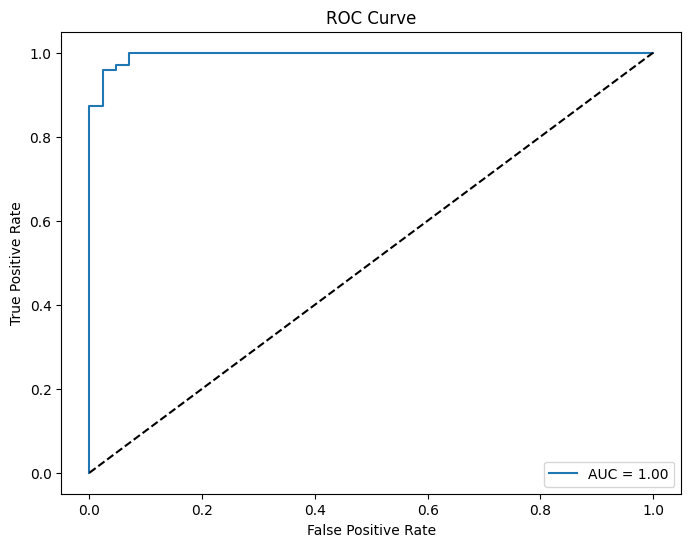

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X_selected = X[selected_features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 피팅
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# ROC 곡선 및 AUC 계산
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib
from sklearn.metrics import accuracy_score

# 모델 저장
joblib.dump(model, 'logistic_regression_model.pkl') # 여러분들이 만든 모델을 실제로 서비스에 적용하거나 IT요건에 반영할때 사용

# 모델 로드
loaded_model = joblib.load('logistic_regression_model.pkl')

# 로드된 모델로 예측
y_pred_loaded = loaded_model.predict(X_test)
print("\n로드된 모델의 정확도:", accuracy_score(y_test, y_pred_loaded))


In [17]:
# 가상 시나리오 설정 -> 단위 테스트!
new_data = pd.DataFrame({
    'mean radius': [15.0, 20.0],
    'mean compactness': [0.1, 0.2],
    'mean concave points': [0.05, 0.1],
    'radius error': [0.2, 0.3],
    'smoothness error' : [0.3, 0.5],
    'concavity error': [0.03, 0.04],
    'concave points error': [0.01, 0.02],
    'worst radius' : [15.0, 20.0],
    'worst texture': [20.0, 30.0],
    'worst area': [500, 1000],
    'worst concavity': [0.3, 0.5],
    'worst symmetry': [0.3, 0.5],
    'worst fractal dimension' : [0.3, 0.5]
})

# 데이터 표준화
# 기존에 전처리 했던것을 잊어버리고, 원데이터를 바로 적용!
# 예측하거나 테스트 하는 데이터도 무조건 같은 요건을 맞춰서 데이터를 준비!
new_data_scaled = scaler.transform(new_data)

# 예측
predictions = model.predict(new_data_scaled)
print("\n가상 시나리오 예측 결과:", predictions)


가상 시나리오 예측 결과: [0 0]


In [18]:
import pandas as pd

# 데이터 로드
train_data = pd.read_csv('cs-training.csv')
test_data = pd.read_csv('cs-test.csv')

# 데이터 살펴보기
print("Train 데이터 shape:", train_data.shape)
print("Test 데이터 shape:", test_data.shape)
print("\nTrain 데이터 처음 5개 행:")
print(train_data.head())
print("\nTest 데이터 처음 5개 행:")
print(test_data.head())

Train 데이터 shape: (42041, 12)
Test 데이터 shape: (42862, 12)

Train 데이터 처음 5개 행:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0           1               1.0                              0.766127  45.0   
1           2               0.0                              0.957151  40.0   
2           3               0.0                              0.658180  38.0   
3           4               0.0                              0.233810  30.0   
4           5               0.0                              0.907239  49.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                   2.0   0.802982         9120.0   
1                                   0.0   0.121876         2600.0   
2                                   1.0   0.085113         3042.0   
3                                   0.0   0.036050         3300.0   
4                                   1.0   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoan

In [19]:
# 결측치가 있으면 로지스틱 회귀가 작동되지 않음 -> Null값에 대해서 제거를 하거나 다른 값 치환하거나

# 결측치 확인
print("\nTrain 데이터 결측치 개수:")
print(train_data.isnull().sum())

# 결측치 처리 (평균값으로 대체)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# 결측치 확인 (확인용)
print("\n결측치 처리 후 Train 데이터 결측치 개수:")
print(train_data.isnull().sum())


Train 데이터 결측치 개수:
Unnamed: 0                                 0
SeriousDlqin2yrs                           1
RevolvingUtilizationOfUnsecuredLines       1
age                                        1
NumberOfTime30-59DaysPastDueNotWorse       1
DebtRatio                                  1
MonthlyIncome                           8451
NumberOfOpenCreditLinesAndLoans            1
NumberOfTimes90DaysLate                    1
NumberRealEstateLoansOrLines               1
NumberOfTime60-89DaysPastDueNotWorse       1
NumberOfDependents                      1132
dtype: int64

결측치 처리 후 Train 데이터 결측치 개수:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansO

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 독립변수(X)와 종속변수(y) 분리
X = train_data.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'])
y = train_data['SeriousDlqin2yrs']
y = (y > 0.5).astype(int)

# 타겟 변수의 고유값 확인
print("타겟 변수 고유값:", y.unique())

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report

print("\n모델 정확도:", accuracy_score(y_val, y_pred))
print("\n분류 보고서:")
print(classification_report(y_val, y_pred))

타겟 변수 고유값: [1 0]

모델 정확도: 0.9344749672969438

분류 보고서:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7853
           1       0.58      0.03      0.06       556

    accuracy                           0.93      8409
   macro avg       0.76      0.52      0.52      8409
weighted avg       0.91      0.93      0.91      8409



In [22]:
# 타겟 변수의 고유값 확인
print("타겟 변수 고유값:", y.unique())

타겟 변수 고유값: [1.         0.         0.06636537]


In [23]:
(y > 0.5).astype(int)

0        1
1        0
2        0
3        0
4        0
        ..
42036    0
42037    0
42038    0
42039    0
42040    0
Name: SeriousDlqin2yrs, Length: 42041, dtype: int64

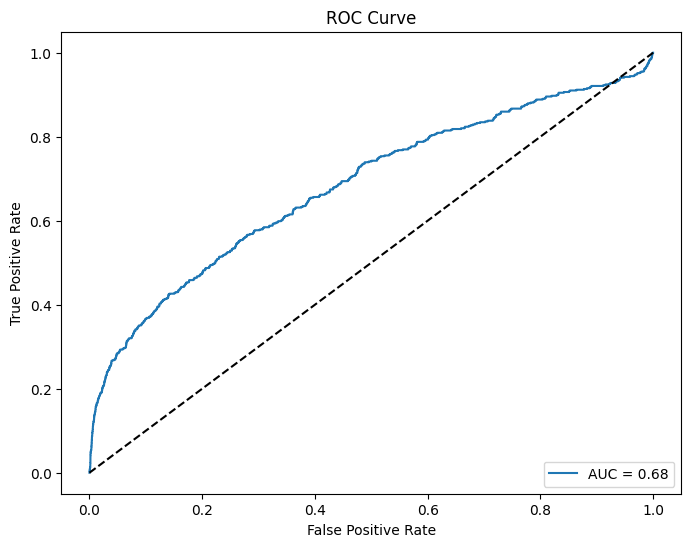

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC 곡선 및 AUC 계산
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [26]:
import numpy as np

# 모델 계수 출력
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\\n모델 계수:")
print(coefficients)

# 오즈비 계산
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print("\\n오즈비:")
print(coefficients)


\n모델 계수:
                                Feature  Coefficient
0  RevolvingUtilizationOfUnsecuredLines    -0.021034
1                                   age    -0.425577
2  NumberOfTime30-59DaysPastDueNotWorse     1.926467
3                             DebtRatio    -0.081544
4                         MonthlyIncome    -0.276425
5       NumberOfOpenCreditLinesAndLoans    -0.057500
6               NumberOfTimes90DaysLate     1.950511
7          NumberRealEstateLoansOrLines     0.057477
8  NumberOfTime60-89DaysPastDueNotWorse    -3.732318
9                    NumberOfDependents     0.093011
\n오즈비:
                                Feature  Coefficient  Odds Ratio
0  RevolvingUtilizationOfUnsecuredLines    -0.021034    0.979186
1                                   age    -0.425577    0.653392
2  NumberOfTime30-59DaysPastDueNotWorse     1.926467    6.865212
3                             DebtRatio    -0.081544    0.921692
4                         MonthlyIncome    -0.276425    0.758490
5       Num

In [29]:
import numpy as np

# 특정 사건의 확률
p = 0.90  # 예를 들어, 대출 상환 성공 확률이 80%라고 가정

# 로그 오즈 계산
log_odds = np.log(p / (1 - p))

# 점수 계산
score = (log_odds / np.log(2)) * 40 + 500 # 500점이 기준, 오즈가 1증가할때 40점을 주는
print(f"Credit Score: {score}")

Credit Score: 626.7970000576925


In [30]:
# 스코어 카드 계산 함수
def calculate_credit_score(data, model, scaler):
    data_scaled = scaler.transform(data)
    log_odds = model.predict_log_proba(data_scaled)[:, 1]
    score = (log_odds / np.log(2)) * 40 + 500
    return score

# 테스트 데이터의 신용평가 점수 산출
test_X = test_data.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'])
credit_scores = calculate_credit_score(test_X, model, scaler)

# 결과 출력
test_data['Credit Score'] = credit_scores
print("\\n테스트 데이터 신용평가 점수:")
print(test_data[['Credit Score']].head())


\n테스트 데이터 신용평가 점수:
   Credit Score
0    340.028026
1    324.622077
2    323.268953
3    379.783960
4    372.421483


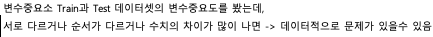

In [ ]:
#1. 이런 경우에는 k-fold ,층화추출 샘플링을 다양하게 시도 -> 변수중요도가 그래도 차이가 많이 나는지 확인
#2. #1번과 같이 햇는데, 그럼에도 차이가 많이 나면

 # 3년치 데이터 분석! 2021,2022,2023
 # 모두 2023년도가 데이터 / 2021,2022년도 개발!
 # 2021~2022년도의 상황 / 2023년도의 상황이 다를수도 있다. 기간 / 조건 / 상황등의 문제가 발생하지 않았는지 체크
